<a href="https://colab.research.google.com/github/NurlailyAsrobika16/PCVK_Genap_2023/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


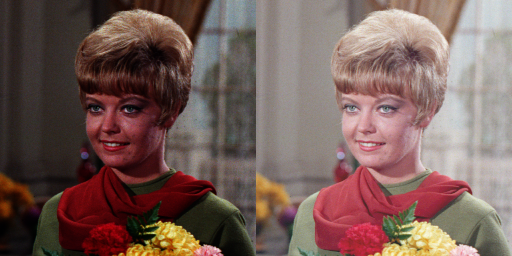

In [4]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np

print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))       # Input nilai bertipe data int
except ValueError:
 print('Error, not a number')

def gammaCorrection(src, gamma):
    invGamma = 1 / gamma                            # invers dari gamma
 
    table = [((i / 255) ** invGamma) * 255 for i in range(256)] # rumus gamma correction untuk i dalam range 256
    table = np.array(table, np.uint8)                           #  table menjadi array numpy yang bertipe data int 8
 
    return cv.LUT(src, table)        # menghasilkan array dengan ukuran dan jumlah saluran yang sama seperti scr(memiliki elemen 8bit) tapi memiliki kedalaman yang sama dengan table(256 elemen).
 
 
img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
gama_image = gammaCorrection(img, gamma)                        # menghasilkan gambar dengan memanggil fungsi gammaCorrection

final_frame = cv.hconcat((img, gama_image))
cv2_imshow(final_frame)
     

2. Buat Simulasi Image Depth
Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra,
pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada
pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000
0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika
7bit, maka jumlah warnanya adalah 27 = 128, dst.
Berikut adalah kode untuk membaca citra masukan dan memberi nilai kedalaman citra,
silahkan lanjutkan kode program berikut sehingga menghasilkan keluaran seperti contoh
pada Gambar.

Image Depth Simulation pada citra
--------------------------------
Masukkan nilai Depth : 2


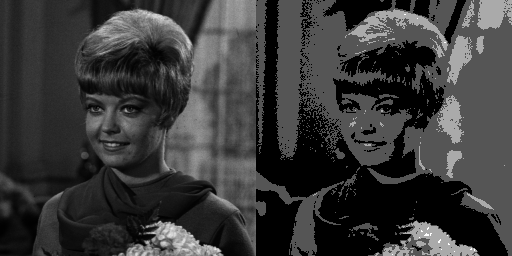

In [8]:

print('Image Depth Simulation pada citra')
print('--------------------------------')

try: 
  depth = int(input('Masukkan nilai Depth : '))     # Input nilai bertipe data int
except ValueError:
  print('error, not a number')

d_img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff', cv.IMREAD_GRAYSCALE)
level = 255/(2** depth - 1)       # mencari level dari nilai depth yang sudah diinputkan

for i in range (depth):
  # operasi perubahan menjadi warna baru dengan memanfaatkan fungsi round yang sudah ada di
  # dalam numpy untuk membulatkan setiap hasil yang didapatkan, tidak lupa digunakan data type
  # uint8 untuk memastikan bahwa nilai yang dihasilkan berada dalam range 0-256 dan angka
  # tidak boleh minus.
  d_img2 = np.array(np.round((d_img/level))*level, dtype='uint8')

final_frame2 = cv.hconcat((d_img, d_img2))
cv2_imshow(final_frame2)
     

3. Buat modul Average Denoising
Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab
sebelumnya.
Citra asli sudah disediakan pada /images/galaxy.jpg.
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder ,
gunakan modul glob (import glob).

Jumlah Citra di Averange:  5
Nilai PSNR (dB) :  100


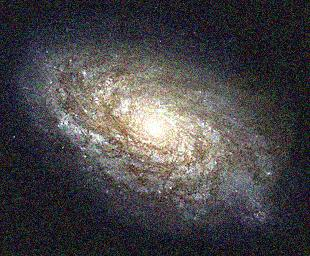


Jumlah Citra di Averange:  30
Nilai PSNR (dB) :  341.55818607307737


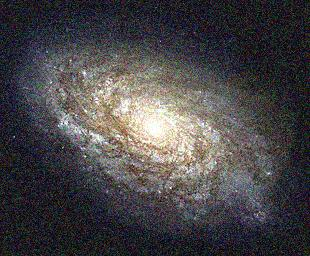


Jumlah Citra di Averange:  60
Nilai PSNR (dB) :  341.55818607307737


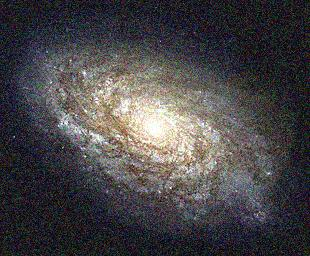


Jumlah Citra di Averange:  80
Nilai PSNR (dB) :  100


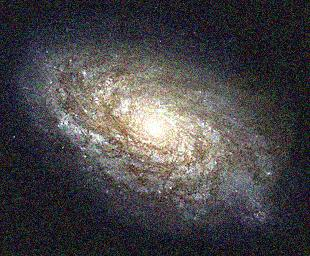


Jumlah Citra di Averange:  100
Nilai PSNR (dB) :  324.9785645490372


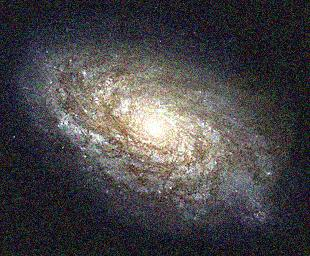

In [11]:
import glob
import math

cv_img = glob.glob('/content/drive/MyDrive/PCVK_MM/Images/noises/1.jpg')      # menemukan semua image .jpg yang berada dalam folder
cv_img.sort()     # fungsi glob tidak memastikan bahwa semua file diurutkan maka digunakan fungsi sort()

def number(n):
  temp = cv.imread(cv_img[0])         # membaca image pertama dalam cv_img
  sum_arr = np.zeros(temp.shape)      # array kosong yang memiliki ukuran yang sama seperti temp
  for picture in cv_img[0:n-1]:         # Melakukan perulangan gambar ke 0 sampai gambar ke n-1 di cv_img dengan
    img = cv.imread(picture)            # operasi dalam perulangan tersebut adalah membuat img yang akan membaca gambar, dan
    sum_arr = sum_arr + img             # mengubah data sum_arr dengan menambahkan img ke dalam sum_arr
  denoised = sum_arr/ n               # hasil dari sum_arr (setelah selesai perulangan) lalu dibagi sebanyak dari nilai n
  
  # memanfaatakn fungsi normalize() di cv2 yang berguna untuk menghilangkan noise dari sebuah gambar dengan cara mengubah intensitas
  # piksel dan meningkatkan kontras secara keseluruhan. 0 dan 255 adalah batas array yang telah
  # ditetapkan dan cv.NORM_MINMAX artinya nilainya harus lebih tinggi dari alfa(0) dan
  # nilainya harus lebih rendah dari beta(255)
  output = cv.normalize(denoised, None, 0, 255, cv.NORM_MINMAX)
  print('Jumlah Citra di Averange: ', n)
  print('Nilai PSNR (dB) : ',PSNR(temp, output))
  cv2_imshow(output)
  print('')

def PSNR(image1, image2):                   # untuk menghitung nilai PSNR
  mse = np.mean((image1 - image2)**2)       # Mendapatkan nilai dari MSE dengna memanfaatkan fungsi mean dalam numpy
  if(mse == 0):
    return 100
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel/math.sqrt(mse))     # Mendapatkan nilai PSNR sesuai rumus dan memanfaatkan library math
  return psnr

number(5)
number(30)
number(60)
number(80)
number(100)
     